# IMAGENS DIGITAIS - NÍVEIS DE CINZA E RGB


## Importa as bibliotecas necessárias

In [1]:
import os
import numpy as np
from skimage import data
import imageio
import matplotlib.pyplot as plt
from matplotlib import patches
import PIL
from PIL import Image
from scipy import misc

## Create output folder

In [2]:
out_path = 'gray_rgb'
if not os.path.exists(out_path):
    os.mkdir(out_path)

## Carrega uma imagem em níveis de cinza

In [3]:
im_camera = data.camera()

Imprime informações sobre a imagem.

In [4]:
print(im_camera.shape)
print(im_camera.dtype)
print(im_camera.min(), im_camera.max())

(512, 512)
uint8
0 255


Plota a imagem na tela.

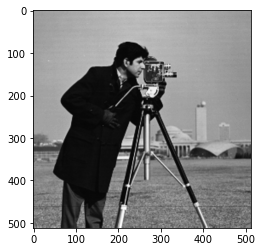

In [5]:
plt.imshow(im_camera, cmap='gray')

## Carrega uma imagem colorida

In [6]:
im_astronaut = data.astronaut()

Imprime informações sobre a imagem.

In [7]:
print(im_astronaut.shape)
print(im_astronaut.dtype)
print(im_astronaut.min(), im_astronaut.max())

(512, 512, 3)
uint8
0 255


Plota a imagem na tela.

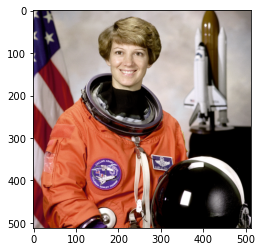

In [8]:
plt.imshow(im_astronaut)

Salva as imagens em disco.

In [9]:
# Salva as imagens em arquivo.
# imageio.imsave(out_path + '/' + 'im_cam.png', im_camera)
# imageio.imsave(out_path + '/' + 'im_ast.png', im_astronaut)

plt.imsave(out_path + '/' + 'im_cam.png', im_camera.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.imsave(out_path + '/' + 'im_ast.png', im_astronaut.astype(np.uint8), vmin=0, vmax=255)

## Recorta uma região das imagens (64 x 64)

In [10]:
cam_orig = (100, 230) # Linha x Coluna
ast_orig = (90, 190) # Linha x Coluna

size = (64, 64) # Alture x Largura

In [11]:
im_cam_64x64 = im_camera[cam_orig[0]:cam_orig[0]+size[0], cam_orig[1]:cam_orig[1]+size[1]]
im_ast_64x64 = im_astronaut[ast_orig[0]:ast_orig[0]+size[0], ast_orig[1]:ast_orig[1]+size[1]]

#### Salva a imagem com a região demarcada

<ipython-input-12-86fef1691e8e>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmin" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_camera_marc.png', dpi = 512, vmin=0, vmax=255)
<ipython-input-12-86fef1691e8e>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmax" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_camera_marc.png', dpi = 512, vmin=0, vmax=255)


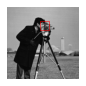

In [12]:
fig = plt.figure()
fig.set_size_inches(512/512, 1, forward=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(im_camera, cmap='gray', vmin=0, vmax=255)
img_desc = plt.gca()
img_desc.add_patch(
    patches.Rectangle((cam_orig[1]-0.5, cam_orig[0]-0.5), size[1], size[0], fill=False, color='r', linewidth=0.5)
)
plt.savefig(out_path + '/' + 'im_camera_marc.png', dpi = 512, vmin=0, vmax=255) 

<ipython-input-13-f8bbb1a469d4>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmin" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_astronaut_marc.png', dpi = 512, vmin=0, vmax=255)
<ipython-input-13-f8bbb1a469d4>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmax" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_astronaut_marc.png', dpi = 512, vmin=0, vmax=255)


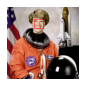

In [13]:
fig = plt.figure()
fig.set_size_inches(512/512, 1, forward=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(im_astronaut, vmin=0, vmax=255)
img_desc = plt.gca()
img_desc.add_patch(
    patches.Rectangle((ast_orig[1]-0.5, ast_orig[0]-0.5), size[1], size[0], fill=False, color='r', linewidth=0.5)
)
plt.savefig(out_path + '/' + 'im_astronaut_marc.png', dpi = 512, vmin=0, vmax=255) 

Imprime informações sobre as imagens.

In [14]:
print(im_ast_64x64.shape)
print(im_ast_64x64.dtype)
print(im_ast_64x64.min(), im_ast_64x64.max())

(64, 64, 3)
uint8
0 255


In [15]:
print(im_cam_64x64.shape)
print(im_cam_64x64.dtype)
print(im_cam_64x64.min(), im_cam_64x64.max())

(64, 64)
uint8
2 231


Plota as imagens na tela.

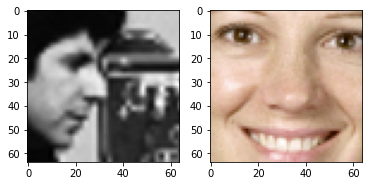

In [16]:
plt.subplot(1,2,1)
plt.imshow(im_cam_64x64, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(im_ast_64x64)

### Interpola as imagens usando vizinhos mais próximos

In [17]:
im_cam_64x64_nn = np.array(Image.fromarray(im_cam_64x64).resize(size=(512, 512), resample=PIL.Image.NEAREST))
im_ast_64x64_nn = np.array(Image.fromarray(im_ast_64x64).resize(size=(512, 512), resample=PIL.Image.NEAREST))

In [18]:
print(im_cam_64x64_nn.shape)
print(im_cam_64x64_nn.dtype)
print(im_cam_64x64_nn.min(), im_cam_64x64_nn.max())

(512, 512)
uint8
2 231


In [19]:
print(im_ast_64x64_nn.shape)
print(im_ast_64x64_nn.dtype)
print(im_ast_64x64_nn.min(), im_ast_64x64_nn.max())

(512, 512, 3)
uint8
0 255


Plota as imagens resultantes.

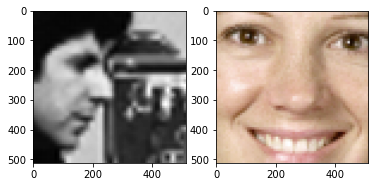

In [20]:
plt.subplot(1,2,1)
plt.imshow(im_cam_64x64_nn, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(im_ast_64x64_nn)

Salva as imagens em disco.

In [21]:
# Salva as imagens em arquivo.
# imageio.imsave(out_path + '/' + 'im_cam_64x64.png', im_cam_64x64_nn)
# imageio.imsave(out_path + '/' + 'im_ast_64x64.png', im_ast_64x64_nn)

plt.imsave(out_path + '/' + 'im_cam_64x64.png', im_cam_64x64_nn.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.imsave(out_path + '/' + 'im_ast_64x64.png', im_ast_64x64_nn.astype(np.uint8), vmin=0, vmax=255)

## Recorta uma região menor da imagem (10x10)

In [22]:
cam_orig = (20, 20)
ast_orig = (5, 5)

size = (10, 10)

In [23]:
im_cam_10x10 = im_cam_64x64[cam_orig[0]:cam_orig[0]+size[0], cam_orig[1]:cam_orig[1]+size[1]]
im_ast_10x10 = im_ast_64x64[ast_orig[0]:ast_orig[0]+size[0], ast_orig[1]:ast_orig[1]+size[1]]

#### Salva a imagem com a região demarcada

<ipython-input-24-ccfb91ce8b47>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmin" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_cam_64x64_marc.png', dpi = 512, vmin=0, vmax=255)
<ipython-input-24-ccfb91ce8b47>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmax" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_cam_64x64_marc.png', dpi = 512, vmin=0, vmax=255)


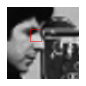

In [24]:
fig = plt.figure()
fig.set_size_inches(512/512, 1, forward=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(im_cam_64x64, cmap='gray', vmin=0, vmax=255)
img_desc = plt.gca()
img_desc.add_patch(
    patches.Rectangle((cam_orig[1]-0.5, cam_orig[0]-0.5), size[1], size[0], fill=False, color='r', linewidth=0.5)
)
plt.savefig(out_path + '/' + 'im_cam_64x64_marc.png', dpi = 512, vmin=0, vmax=255) 

<ipython-input-25-f517ac242aaf>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmin" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_ast_64x64_marc.png', dpi = 512, vmin=0, vmax=255)
<ipython-input-25-f517ac242aaf>:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmax" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_ast_64x64_marc.png', dpi = 512, vmin=0, vmax=255)


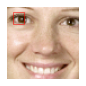

In [25]:
fig = plt.figure()
fig.set_size_inches(512/512, 1, forward=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(im_ast_64x64, vmin=0, vmax=255)
img_desc = plt.gca()
img_desc.add_patch(
    patches.Rectangle((ast_orig[1]-0.5, ast_orig[0]-0.5), size[1], size[0], fill=False, color='r', linewidth=0.5)
)
plt.savefig(out_path + '/' + 'im_ast_64x64_marc.png', dpi = 512, vmin=0, vmax=255) 

In [26]:
print(im_cam_10x10.shape)
print(im_cam_10x10.dtype)
print(im_cam_10x10.min(), im_cam_10x10.max())

(10, 10)
uint8
9 214


In [27]:
print(im_ast_10x10.shape)
print(im_ast_10x10.dtype)
print(im_ast_10x10.min(), im_ast_10x10.max())

(10, 10, 3)
uint8
1 231


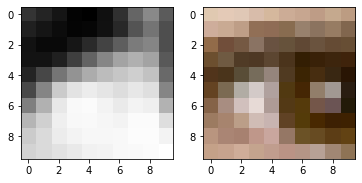

In [28]:
plt.subplot(1,2,1)
plt.imshow(im_cam_10x10, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(im_ast_10x10)

### Interpola as imagens usando vizinhos mais próximos

In [29]:
im_cam_10x10_nn = np.array(Image.fromarray(im_cam_10x10).resize(size=(512, 512), resample=PIL.Image.NEAREST))
im_ast_10x10_nn = np.array(Image.fromarray(im_ast_10x10).resize(size=(512, 512), resample=PIL.Image.NEAREST))

Imprime informações sobre as imagens

In [30]:
print(im_cam_10x10_nn.shape)
print(im_cam_10x10_nn.dtype)
print(im_cam_10x10_nn.min(), im_cam_10x10_nn.max())

(512, 512)
uint8
9 214


In [31]:
print(im_ast_10x10_nn.shape)
print(im_ast_10x10_nn.dtype)
print(im_ast_10x10_nn.min(), im_ast_10x10_nn.max())

(512, 512, 3)
uint8
1 231


Plota as imagens resultantes.

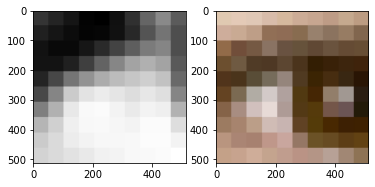

In [32]:
plt.subplot(1,2,1)
plt.imshow(im_cam_10x10_nn, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(im_ast_10x10_nn)

In [33]:
# Salva as imagens em arquivo.
# imageio.imsave(out_path + '/' + 'im_cam_10x10.png', im_cam_10x10_nn)
# imageio.imsave(out_path + '/' + 'im_ast_10x10.png', im_ast_10x10_nn)

plt.imsave(out_path + '/' + 'im_cam_10x10.png', im_cam_10x10_nn.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.imsave(out_path + '/' + 'im_ast_10x10.png', im_ast_10x10_nn.astype(np.uint8), vmin=0, vmax=255)

## Recorta uma região menor da imagem (4x4)

In [34]:
cam_orig = (3, 3)
ast_orig = (3, 3)

size = (4, 4)

In [35]:
im_cam_4x4 = im_cam_10x10[cam_orig[0]:cam_orig[0]+size[0], cam_orig[1]:cam_orig[1]+size[1]]
im_ast_4x4 = im_ast_10x10[ast_orig[0]:ast_orig[0]+size[0], ast_orig[1]:ast_orig[1]+size[1]]

<ipython-input-36-10a9d4ae7137>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmin" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_cam_10x10_marc.png', dpi = 512, vmin=0, vmax=255)
<ipython-input-36-10a9d4ae7137>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmax" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_cam_10x10_marc.png', dpi = 512, vmin=0, vmax=255)


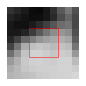

In [36]:
# https://fengl.org/2014/07/09/matplotlib-savefig-without-borderframe/
fig = plt.figure()
fig.set_size_inches(512/512, 1, forward=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(im_cam_10x10, cmap='gray', vmin=0, vmax=255)
img_desc = plt.gca()
img_desc.add_patch(
    patches.Rectangle((cam_orig[1]-0.5, cam_orig[0]-0.5), size[1], size[0], fill=False, color='r', linewidth=0.5)
)
plt.savefig(out_path + '/' + 'im_cam_10x10_marc.png', dpi = 512, vmin=0, vmax=255) 

<ipython-input-37-1a5ca8d22ef4>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmin" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_ast_10x10_marc.png', dpi = 512, vmin=0, vmax=255)
<ipython-input-37-1a5ca8d22ef4>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmax" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_ast_10x10_marc.png', dpi = 512, vmin=0, vmax=255)


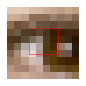

In [37]:
# https://fengl.org/2014/07/09/matplotlib-savefig-without-borderframe/
fig = plt.figure()
fig.set_size_inches(512/512, 1, forward=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(im_ast_10x10, vmin=0, vmax=255)
img_desc = plt.gca()
img_desc.add_patch(
    patches.Rectangle((ast_orig[1]-0.5, ast_orig[0]-0.5), size[1], size[0]-0.5, fill=False, color='r', linewidth=0.5)
)
plt.savefig(out_path + '/' + 'im_ast_10x10_marc.png', dpi = 512, vmin=0, vmax=255) 

In [38]:
print(im_cam_4x4.shape)
print(im_cam_4x4.dtype)
print(im_cam_4x4.min(), im_ast_4x4.max())

(4, 4)
uint8
60 231


In [39]:
print(im_ast_4x4.shape)
print(im_ast_4x4.dtype)
print(im_ast_4x4.min(), im_ast_10x10.max())

(4, 4, 3)
uint8
3 231


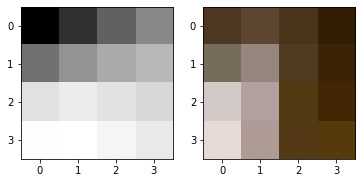

In [40]:
plt.subplot(1,2,1)
plt.imshow(im_cam_4x4, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(im_ast_4x4)

### Interpola as imagens usando vizinhos mais próximos

In [41]:
im_cam_4x4_nn = np.array(Image.fromarray(im_cam_4x4).resize(size=(512, 512), resample=PIL.Image.NEAREST))
im_ast_4x4_nn = np.array(Image.fromarray(im_ast_4x4).resize(size=(512, 512), resample=PIL.Image.NEAREST))

In [42]:
print(im_cam_4x4_nn.shape)
print(im_cam_4x4_nn.dtype)
print(im_cam_4x4_nn.min(), im_cam_4x4_nn.max())

(512, 512)
uint8
60 210


In [43]:
print(im_ast_4x4_nn.shape)
print(im_ast_4x4_nn.dtype)
print(im_ast_4x4_nn.min(), im_ast_4x4_nn.max())

(512, 512, 3)
uint8
3 231


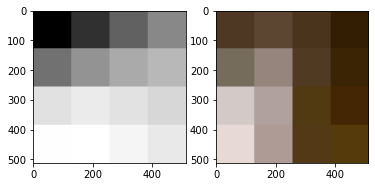

In [44]:
plt.subplot(1,2,1)
plt.imshow(im_cam_4x4_nn, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(im_ast_4x4_nn)

In [45]:
# Salva as imagens em arquivo.
# imageio.imsave(out_path + '/' + 'im_cam_4x4.png', im_cam_4x4_nn)
# imageio.imsave(out_path + '/' + 'im_ast_4x4.png', im_ast_4x4_nn)


plt.imsave(out_path + '/' + 'im_cam_4x4.png', im_cam_4x4_nn.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.imsave(out_path + '/' + 'im_ast_4x4.png', im_ast_4x4_nn.astype(np.uint8), vmin=0, vmax=255)

### Imprime os valores dos pixels

In [46]:
print(im_cam_4x4)

[[ 60  89 117 140]
 [127 147 160 168]
 [192 198 193 186]
 [209 210 204 197]]


#### Canal R

In [47]:
print(im_ast_4x4[:,:,0])

[[ 78  92  75  51]
 [118 149  80  59]
 [211 176  81  69]
 [231 174  83  85]]


#### Canal G

In [48]:
print(im_ast_4x4[:,:,1])

[[ 56  70  52  30]
 [108 133  58  36]
 [202 161  57  38]
 [218 155  57  58]]


#### Canal B

In [49]:
print(im_ast_4x4[:,:,2])

[[ 36  49  28   3]
 [ 91 124  33   3]
 [200 158  17   4]
 [214 150  21  11]]


## Monta imagem com os valores

<ipython-input-50-95e00fcfe38e>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmin" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_cam_4x4_labels.png', dpi = 512, vmin=0, vmax=255)
<ipython-input-50-95e00fcfe38e>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmax" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_cam_4x4_labels.png', dpi = 512, vmin=0, vmax=255)


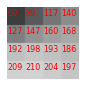

In [50]:
# https://fengl.org/2014/07/09/matplotlib-savefig-without-borderframe/
fig = plt.figure()
fig.set_size_inches(512/512, 1, forward=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(im_cam_4x4_nn, cmap='gray', vmin=0, vmax=255)

for i in range(im_cam_4x4.shape[0]):
    for j in range(im_cam_4x4.shape[1]):
        ### label = "{:.2f}".format(im_cam_4x4[i,j])
        label = "{:.2f}".format(im_cam_4x4[j,i])

        # Column, Row
        ### ax.text( i*128, j*128 + 64,  "{:.0f}".format(im_cam_4x4[i,j]), color='r', fontsize=8)
        ax.text( i*128, j*128 + 64,  "{:.0f}".format(im_cam_4x4[j,i]), color='r', fontsize=8)

plt.savefig(out_path + '/' + 'im_cam_4x4_labels.png', dpi = 512, vmin=0, vmax=255) 

<ipython-input-51-e628d0d2e2ed>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmin" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_ast_4x4_labels.png', dpi = 512, vmin=0, vmax=255)
<ipython-input-51-e628d0d2e2ed>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "vmax" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(out_path + '/' + 'im_ast_4x4_labels.png', dpi = 512, vmin=0, vmax=255)


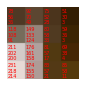

In [51]:
# https://fengl.org/2014/07/09/matplotlib-savefig-without-borderframe/
fig = plt.figure()
fig.set_size_inches(512/512, 1, forward=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(im_ast_4x4_nn, cmap='gray', vmin=0, vmax=255)

for i in range(im_ast_4x4.shape[0]):
    for j in range(im_ast_4x4.shape[1]):
        for k in range(im_ast_4x4.shape[2]):
            ### label = "{:.2f}".format(im_cam_4x4[i,j])
            label = "{:.2f}".format(im_cam_4x4[j,i])

            # Column, Row
            ### ax.text( i*128, j*128 + (k+1)*40,  "{:.0f}".format(im_ast_4x4[i,j,k]), color='r', fontsize=5)
            ax.text( i*128, j*128 + (k+1)*40,  "{:.0f}".format(im_ast_4x4[j,i,k]), color='r', fontsize=5)

plt.savefig(out_path + '/' + 'im_ast_4x4_labels.png', dpi = 512, vmin=0, vmax=255) 